## Projeto

O projeto desde módulo será uma aplicação prática do conteúdo de visualização de dados no python.  
  
**Objetivo**  
Realizar um EDA (Exploratory Data Analysis) implementando gráficos para tornar o resultado visual. Lembre-se de explorar as bibliotecas estudadas neste módulo (Pandas, Matplotlib, Plotly, Seaborn)  
  
**Base de Dados**  
Cada grupo será responsável por buscar uma base de dados de seu interesse  
  
**Composição das duplas**  
As duplas estão descritas segundo o excel "Equipes" presente no google drive, na pasta "projeto"  
  
**Github**  
Na mesma planilha das duplas insiram o link para o github  
  
**Apresentação**  
A apresentação poderá ser construída no formato de preferência (jupyter notebook, power point..)  
  
**Tempo de apresentação**  
Cada grupo terá no máximo 10 minutos para apresentar o EDA  
  
**Avaliação**  
Para a avaliação serão considerados os seguintes pontos
1. Entendimento do contexto em que se encaixa a base de dados
2. Uso de todas bibliotecas apresentadas neste módulo para criação de gráficos (ao menos um gráfico de cada biblioteca)
3. Apresentação das características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários
4. Uso dos diferentes tipos de gráficos com as variáveis numéricas e categóricas 
5. Identificação e discussão de missings ou outliers na base de dados
6. Outras análises que sejam pertinentes 
  
**Data de apresentação**  
08/06/2022  
  
**Obs. 1**: Não esqueçam de considerar se as informações são públicas  
**Obs. 2**: Não esqueçam de se divertirem fazendo isso! :D  
  
**BOM TRABALHO!**

# Importando os dados

In [ ]:
link = 'https://drive.google.com/open?id=12LpCQ8fVeOKHKWChFDVohDfU9nAL-eTy' # The shareable link
##

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

!pip install plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

!pip install phik
import phik
from phik import resources, report

%matplotlib inline
pd.set_option('display.max_columns', None)
# Authenticate and create the PyDrive client.

def import_drive_file(link, sep):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    fluff, id = link.split('=')
    print (id) # Verify that you have everything after '='

    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile('Filename.csv')  
    df = pd.read_csv('Filename.csv', sep=sep)
    return df

In [ ]:
df = import_drive_file(link="https://drive.google.com/open?id=12ZxMRJu6w42xVvuz0P0AA7X_WXLLWIO9", sep=",")
df.head()

12ZxMRJu6w42xVvuz0P0AA7X_WXLLWIO9


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
patient_distinct.pivot_table(index='race', values='patient_nbr', aggfunc='count').sort_values(by="patient_nbr", ascending=False)

,patient_nbr
race,
Caucasian,53601
AfricanAmerican,12932
?,1977
Hispanic,1534
Other,1209
Asian,517


In [ ]:
patient_distinct_g = df[['patient_nbr', 'gender']].drop_duplicates()

df_bar_g = patient_distinct_g.pivot_table(index='gender', values='patient_nbr', aggfunc='count').sort_values(by="patient_nbr", ascending=False)

fig = px.bar(df_bar_g)
fig.update_layout(
    xaxis_title="Gênero",
    yaxis_title="Quantidade de pessoas",
    title={
        'text': 'Distribuição de pessoas por gênero',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })
fig.update_layout(showlegend=False)
fig.show()
#df["race"].value_counts()

In [ ]:
patient_distinct_r = df[['patient_nbr', 'race']].drop_duplicates()

df_bar_r = patient_distinct_r.pivot_table(index='race', values='patient_nbr', aggfunc='count').sort_values(by="patient_nbr", ascending=False)

fig = px.bar(df_bar_r)
fig.update_layout(
    xaxis_title="Raça",
    yaxis_title="Quantidade de pessoas",
    title={
        'text': 'Distribuição de pessoas por raça',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })
fig.update_layout(showlegend=False)
fig.show()
#df["race"].value_counts()

In [ ]:
patient_distinct_i = df[['patient_nbr', 'age']].drop_duplicates()

df_bar_i = patient_distinct_i.pivot_table(index='age', values='patient_nbr', aggfunc='count')

fig = px.bar(df_bar_i)
fig.update_layout(
    xaxis_title="Faixa Etária",
    yaxis_title="Quantidade de pessoas",
    title={
        'text': 'Distribuição de pessoas por faixa etária',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })
fig.update_layout(showlegend=False)
#fig.update_xaxes(categoryorder='array', categoryarray= ['<25','25-34','35-44','45-54','55-64', '65-74','>74'])
fig.show()
#df["race"].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



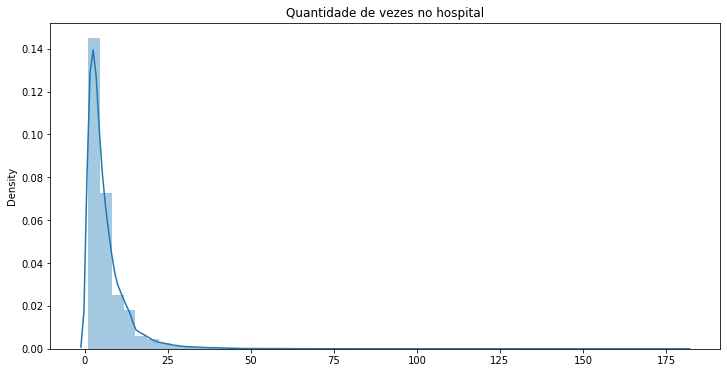

In [ ]:
#df["patient_nbr"].unique().value_counts()
df_time_hosp = df.pivot_table(index='patient_nbr', values='time_in_hospital', aggfunc='sum')

plt.figure(figsize=(12,6))
ax = sns.distplot(x=df_time_hosp['time_in_hospital'])
ax.set_title('Quantidade de vezes no hospital');

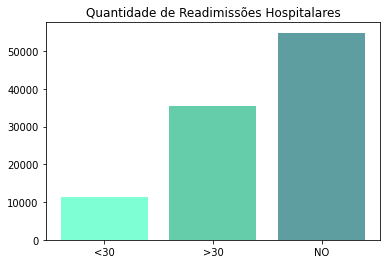

In [ ]:
df_bar_readmitted = df.pivot_table(index='readmitted', values='encounter_id', aggfunc='count')
df_bar_readmitted

ax = plt.bar(df_bar_readmitted.index, df_bar_readmitted['encounter_id'], color=['#7FFFD4', '#66CDAA', '#5F9EA0'])
plt.title('Quantidade de Readimissões Hospitalares');

/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:84: UserWarning:

Not enough unique value for variable citoglipton for analysis 1. Dropping this column

/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:84: UserWarning:

Not enough unique value for variable examide for analysis 1. Dropping this column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



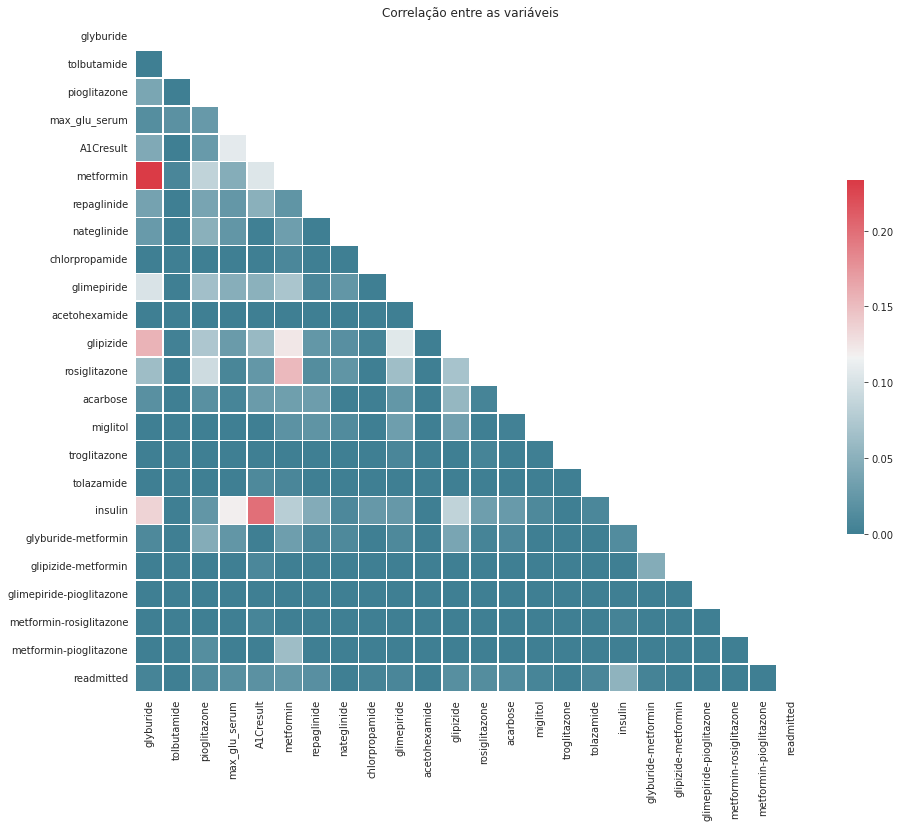

In [ ]:
df_cat = df[['glyburide','tolbutamide','pioglitazone','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
    'acetohexamide','glipizide','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide',
    'citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone', 'readmitted']]


corr = df_cat.phik_matrix()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 13))
    ax = sns.heatmap(corr, mask=mask, cmap = cmap, square=True, #annot = True, 
                     linewidths = .5, cbar_kws = {"shrink": .5})
    plt.title('Correlação entre as variáveis')

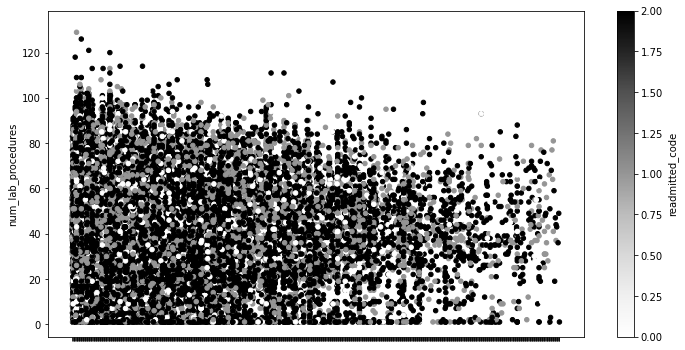

In [ ]:
#diag_1, num_lab_procedures, readmitted

ax = df.plot(x='diag_1', y='num_lab_procedures', kind='scatter',c='readmitted_code', figsize=(12,6))
ax

In [ ]:
fig=px.scatter(data_frame=df, x='diag_1', y='time_in_hospital', color='readmitted')

fig.update_layout(
    xaxis_title={
        'text':'Massa corporal em g',
        'font_size': 18
    },
    yaxis_title={
        'text': 'Altura do bico',
        'font_size': 18
    },
    legend_title={
        'text':'Sexo',
        'font_size': 18
    },
    font_color='grey',
    title={
        'text': 'Massa dos pinguins em função da altura do bico',
        'x': 0.5,
        'y': 0.93,
        'font_family': 'Times New Roman',
        'font_color': 'black',
        'font_size': 20
    },
    template='presentation'
)

In [ ]:
df.pivot_table(index="race", values=['encounter_id'], columns="readmitted", aggfunc='count').reset_index()

race encounter_id              
readmitted                           <30    >30     NO
0                         ?          188    538   1547
1           AfricanAmerican         2155   6634  10421
2                     Asian           65    161    415
3                 Caucasian         8592  27124  40383
4                  Hispanic          212    642   1183
5                     Other          145    446    915

In [ ]:
df_stack=df.groupby(['race','readmitted']).size().reset_index()
df_stack['Percentage']=df.groupby(['race','readmitted']).size().groupby(level=0).apply(lambda x:100 * x/float(x.sum())).values
df_stack.columns= ['race', 'readmitted', 'Counts','Percentage']
df_stack['Percentage'] = df_stack['Percentage'].map('{:,.2f}%'.format) 

In [ ]:
df_stack

,race,readmitted,Counts,Percentage
0,?,<30,188,8.27%
1,?,>30,538,23.67%
2,?,NO,1547,68.06%
3,AfricanAmerican,<30,2155,11.22%
4,AfricanAmerican,>30,6634,34.53%
5,AfricanAmerican,NO,10421,54.25%
6,Asian,<30,65,10.14%
7,Asian,>30,161,25.12%
8,Asian,NO,415,64.74%
9,Caucasian,<30,8592,11.29%


In [ ]:
fig2=px.bar(df_stack, x='race', y='Percentage', color='readmitted', barmode ='stack')
#fig2.update_layout(title = "Education Level Customers' Composition", 
      #xaxis_title = 'Customer Condition', yaxis_title =  
#      'Percentage', width = 1600, height = 1400)
fig2.show()